In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# classifier we will use
from sklearn.tree import DecisionTreeClassifier

# model selection bits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# !pip instal plotting

# plotting
from plotting import plot_learning_curve, plot_validation_curve



In [11]:
## we are going to hardcode the column names, because this just makes it a little easier to use pandas.

names = ['word_freq_make:        ',
'word_freq_address:     ',
'word_freq_all:         ',
'word_freq_3d:          ',
'word_freq_our:         ',
'word_freq_over:        ',
'word_freq_remove:      ',
'word_freq_internet:    ',
'word_freq_order:       ',
'word_freq_mail:        ',
'word_freq_receive:     ',
'word_freq_will:        ',
'word_freq_people:      ',
'word_freq_report:      ',
'word_freq_addresses:   ',
'word_freq_free:        ',
'word_freq_business:    ',
'word_freq_email:       ',
'word_freq_you:         ',
'word_freq_credit:      ',
'word_freq_your:        ',
'word_freq_font:        ',
'word_freq_000:         ',
'word_freq_money:       ',
'word_freq_hp:          ',
'word_freq_hpl:         ',
'word_freq_george:      ',
'word_freq_650:         ',
'word_freq_lab:         ',
'word_freq_labs:        ',
'word_freq_telnet:      ',
'word_freq_857:         ',
'word_freq_data:        ',
'word_freq_415:         ',
'word_freq_85:          ',
'word_freq_technology:  ',
'word_freq_1999:        ',
'word_freq_parts:       ',
'word_freq_pm:          ',
'word_freq_direct:      ',
'word_freq_cs:          ',
'word_freq_meeting:     ',
'word_freq_original:    ',
'word_freq_project:     ',
'word_freq_re:          ',
'word_freq_edu:         ',
'word_freq_table:       ',
'word_freq_conference:  ',
'char_freq_;:           ',
'char_freq_(:           ',
'char_freq_[:           ',
'char_freq_!:           ',
'char_freq_$:           ',
'char_freq_#:           ',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total: ',
'label']
          

In [14]:
## Load in the dataset here 

data = pd.read_csv('spambase.csv', names = names)
X = data.drop('label', axis = 1)
y = data.label

In [15]:
# this time we will keep a bit more data for training and validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify = y)

In [16]:
# create a default decision tree model
clf = DecisionTreeClassifier()

# create a stratifiedKfold cv object -- we want stratified to keep the class balance across folds
cv = StratifiedKFold(n_splits = 5)  # set it for 5 folds

# get the scores back using the helper function, make sure to pass a scoring function string - otherwise you default to accuracy
scores = cross_val_score(clf,X,y,scoring=None,cv=cv  )

In [17]:
print(scores)

[0.89033659 0.89782609 0.90978261 0.91521739 0.79673913]


In [18]:
print(scores.mean())


0.8819803616107255


In [19]:
sss_split = StratifiedShuffleSplit(n_splits =100 , test_size=0.25) # fill in the params
scores_sss = cross_val_score(clf,X_train,y_train,cv=sss_split,scoring='f1')# your code here


In [20]:
# print at your own risk!
print (scores_sss)

[0.89437586 0.87172775 0.90607735 0.86065574 0.88010899 0.86860304
 0.89042996 0.88315217 0.86269071 0.90313779 0.90179806 0.87172414
 0.87704918 0.89920424 0.88951049 0.87004104 0.88251366 0.87945205
 0.88488211 0.88       0.87413555 0.89958735 0.89402174 0.85123967
 0.87824897 0.87567568 0.86730506 0.88950276 0.88180611 0.88645691
 0.88529015 0.87323944 0.88010899 0.86538462 0.89192886 0.88034188
 0.87845304 0.87448276 0.87791495 0.89108911 0.88707483 0.89192886
 0.89437586 0.91928865 0.87912088 0.89251701 0.86920981 0.89673913
 0.88676671 0.89875173 0.88340192 0.90735695 0.88456189 0.87603306
 0.86684783 0.87603306 0.87912088 0.88765603 0.87757909 0.89073306
 0.88738128 0.86797753 0.88736264 0.89645777 0.87878788 0.90040928
 0.87585266 0.85675676 0.88326301 0.87771739 0.89918256 0.88186813
 0.89459459 0.87312415 0.88219178 0.89626556 0.89042996 0.87926509
 0.89944134 0.86145405 0.89918256 0.88423989 0.87362637 0.89071038
 0.87804878 0.88372093 0.86908078 0.85871056 0.86740331 0.8882

In [21]:
scores_sss.mean()

0.8829391220921129

/tmp/ipykernel_28611/4011968564.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores_sss, bins=10);  # go ahead and try different bins


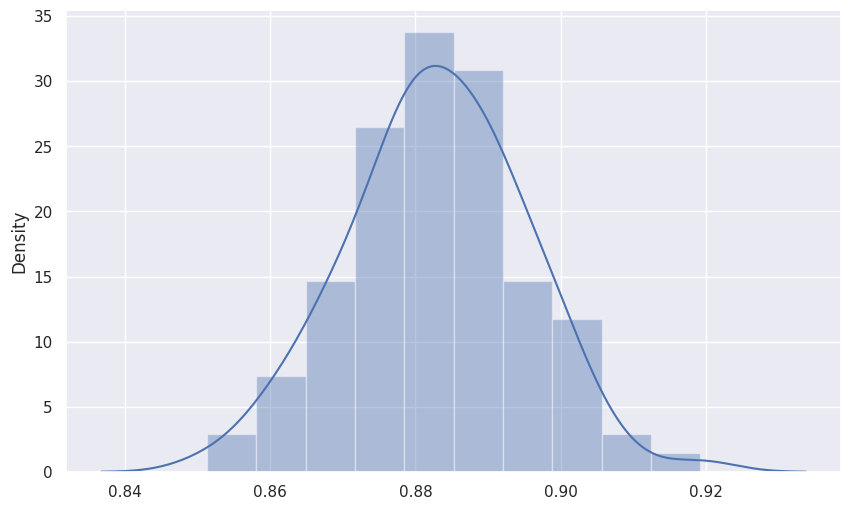

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(scores_sss, bins=10);  # go ahead and try different bins

In [23]:
# you need to setup a paramgrid.  I will give you one example

params = {'max_depth':[2,10,20,30],
              'min_samples_leaf':[2,20,50],
              'min_samples_split':[2,20,50]} # will check max depth for those four parameters.

In [24]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1)

In [25]:
# fit your grid-search! - it's an estimator so you fit it like a normal model.
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 10, 20, 30],
                         'min_samples_leaf': [2, 20, 50],
                         'min_samples_split': [2, 20, 50]},
             scoring='f1')

In [26]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [27]:
grid.best_score_


0.8924763650181756

In [28]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [29]:
results = pd.DataFrame(grid.cv_results_)

In [30]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014379,0.000693,0.011664,0.014350,2,2,2,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.795455,0.807767,0.804598,0.800774,0.807921,0.803303,0.00471,28
1,0.028595,0.028684,0.008417,0.007174,2,2,20,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.795455,0.807767,0.804598,0.800774,0.807921,0.803303,0.00471,28
2,0.013873,0.000481,0.004881,0.000379,2,2,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.795455,0.807767,0.804598,0.800774,0.807921,0.803303,0.00471,28
3,0.020279,0.007251,0.007675,0.005778,2,20,2,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.795455,0.807767,0.804598,0.800774,0.807921,0.803303,0.00471,28
4,0.014909,0.000991,0.005853,0.002155,2,20,20,"{'max_depth': 2, 'min_samples_leaf': 20, 'min_...",0.795455,0.807767,0.804598,0.800774,0.807921,0.803303,0.00471,28


In [31]:
results.shape

(36, 16)

In [32]:
results['rank_test_score']

0     28
1     28
2     28
3     28
4     28
5     28
6     34
7     34
8     34
9      1
10     2
11     6
12    15
13    10
14    16
15    19
16    19
17    19
18     5
19     3
20     7
21    11
22    11
23    17
24    19
25    19
26    19
27     9
28     4
29     8
30    11
31    11
32    17
33    19
34    19
35    19
Name: rank_test_score, dtype: int32

In [33]:
print(results.iloc[9])

mean_fit_time                                                       0.044012
std_fit_time                                                        0.003874
mean_score_time                                                     0.005183
std_score_time                                                      0.001967
param_max_depth                                                           10
param_min_samples_leaf                                                     2
param_min_samples_split                                                    2
params                     {'max_depth': 10, 'min_samples_leaf': 2, 'min_...
split0_test_score                                                   0.900524
split1_test_score                                                   0.886121
split2_test_score                                                   0.886076
split3_test_score                                                   0.884135
split4_test_score                                                   0.905526

In [34]:
import scipy

/tmp/ipykernel_28611/3964945327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scipy.stats.norm(5, scale=2).rvs(1000));


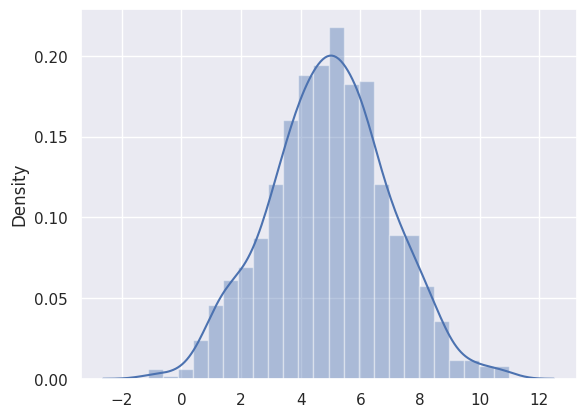

In [35]:
sns.distplot(scipy.stats.norm(5, scale=2).rvs(1000));

/tmp/ipykernel_28611/264141710.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numbers.astype(int));


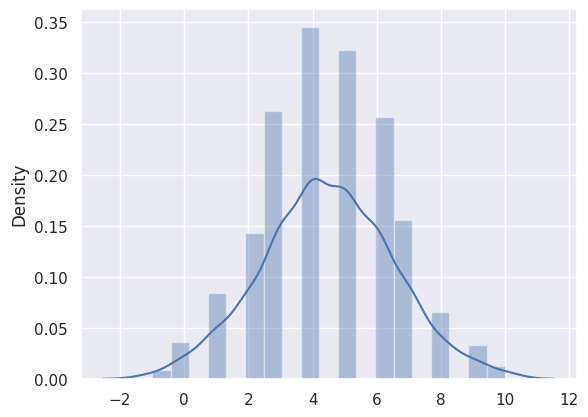

In [36]:
numbers = scipy.stats.norm(5, scale=2).rvs(1000)
sns.distplot(numbers.astype(int)); 

/tmp/ipykernel_28611/530901610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scipy.stats.randint(0,50).rvs(1000));


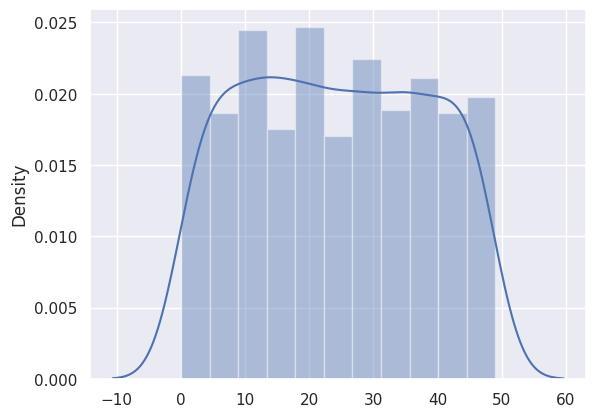

In [37]:
sns.distplot(scipy.stats.randint(0,50).rvs(1000));

In [38]:
rand_params = { 'max_depth': scipy.stats.randint(2,100),
               'min_samples_split':scipy.stats.randint(2,50),
               'min_samples_leaf':scipy.stats.randint(2,50)}

## note that we don't say "how many" samples to draw in the param grid.
## We will do that below when we create the RandomizedSearchCV object

In [39]:
rand_search = RandomizedSearchCV(clf,rand_params,n_iter=4,scoring='f1',n_jobs=-1,cv=StratifiedKFold(n_splits=5))

In [40]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=4, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4319737640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b43549ac850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b431968f340>},
                   scoring='f1')

In [41]:
rand_search.best_score_

0.8745883024787491

In [42]:
rand_search.best_estimator_


DecisionTreeClassifier(max_depth=76, min_samples_leaf=18, min_samples_split=5)

In [43]:
rand_search.best_params_

{'max_depth': 76, 'min_samples_leaf': 18, 'min_samples_split': 5}

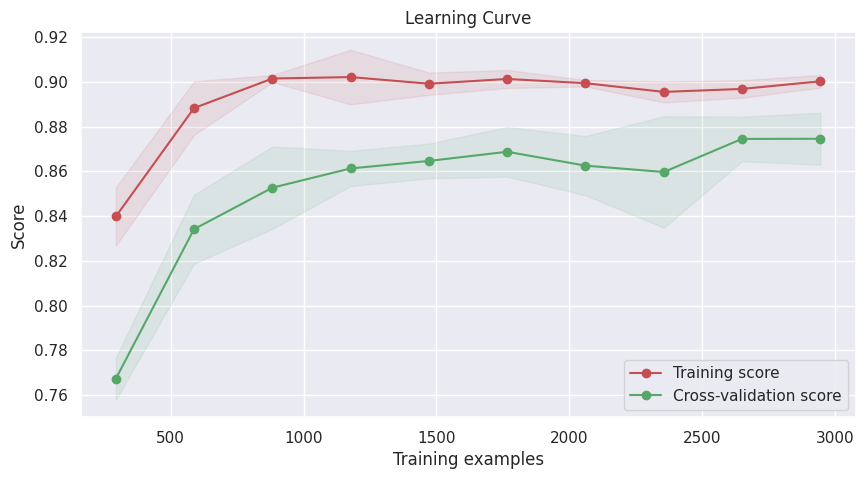

In [44]:
fig=plot_learning_curve(rand_search.best_estimator_,X_train,y_train,cv=StratifiedKFold(n_splits=5),train_sizes=np.linspace(0.1,1.0,10),scoring='f1')

In [45]:
k=StratifiedKFold(n_splits=5)

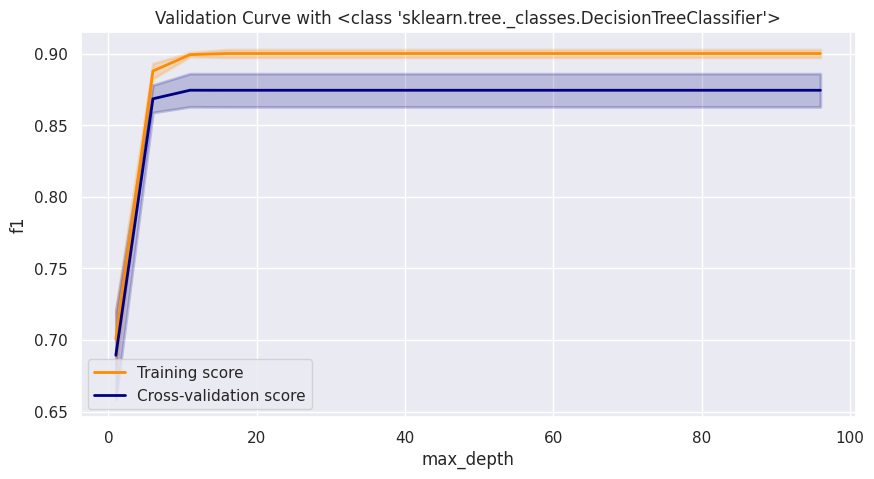

In [46]:
val1=plot_validation_curve(rand_search.best_estimator_,X_train,y_train,cv=StratifiedKFold(n_splits=5),param_range=np.arange(1,100,5),param_name='max_depth',scoring='f1')

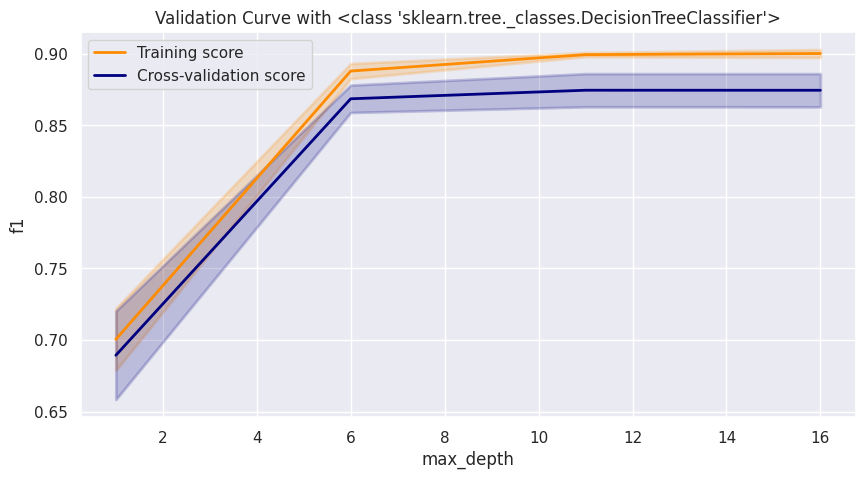

In [47]:
val1=plot_validation_curve(rand_search.best_estimator_,X_train,y_train,cv=k,param_range=np.arange(1,20,5),param_name='max_depth',scoring='f1')

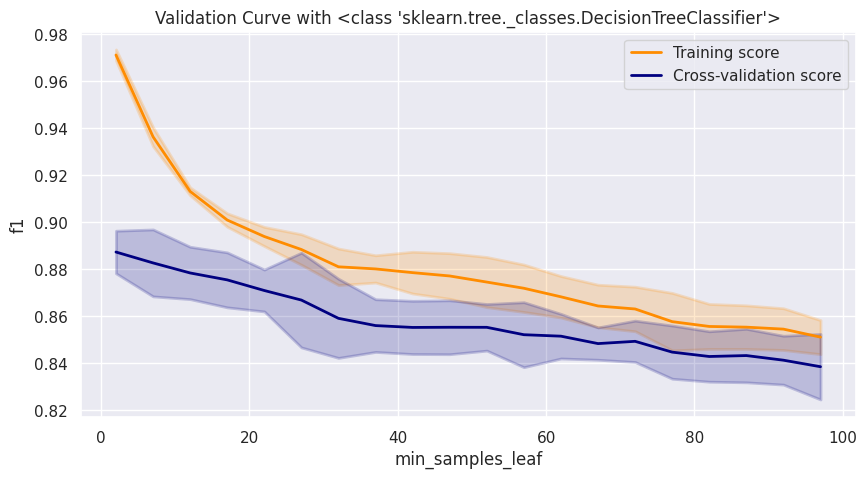

In [48]:
val1=plot_validation_curve(rand_search.best_estimator_,X_train,y_train,cv=k,param_range=np.arange(2,100,5),param_name='min_samples_leaf',scoring='f1')

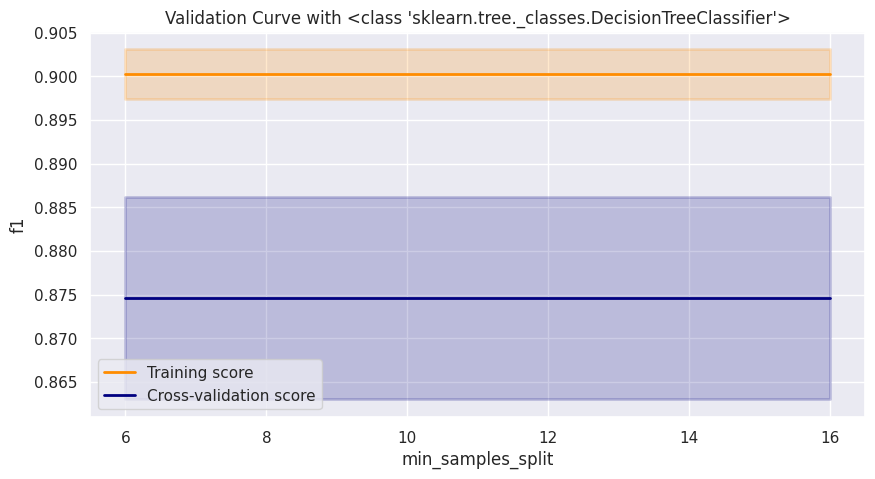

In [49]:
val1=plot_validation_curve(rand_search.best_estimator_,X_train,y_train,cv=k,param_range=np.arange(1,20,5),param_name='min_samples_split',scoring='f1')

In [50]:
new_clf=DecisionTreeClassifier(min_samples_leaf=2,max_depth=64,min_samples_split=9)

In [51]:
new_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=64, min_samples_leaf=2, min_samples_split=9)

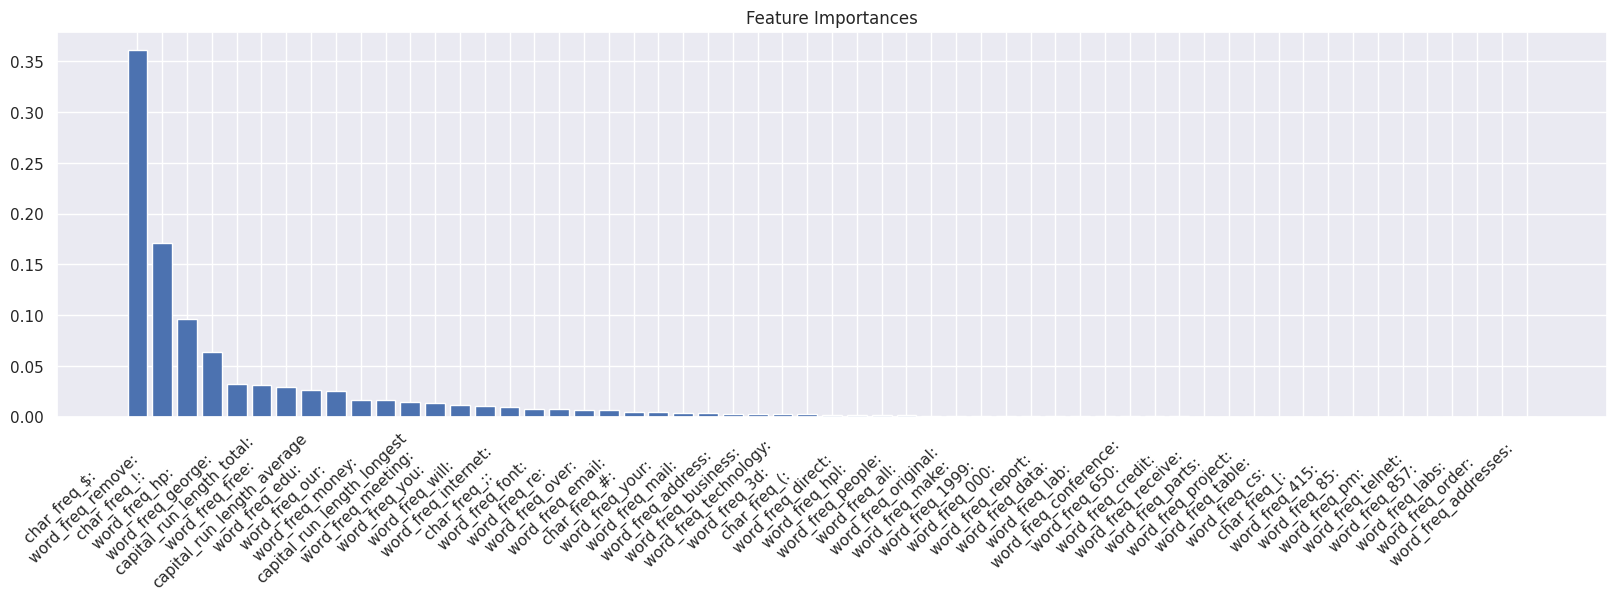

In [52]:
## https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/

importances = new_clf.feature_importances_

indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature names
# I have my original names list of feature names, which corresponds to the features in the tree.
f_names = [names[i] for i in indices]

#create my plot
fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');


In [53]:
new_clf.fit(X_train,y_train)
preds=new_clf.predict(X_test)
f1_score(y_test,preds)

0.889196675900277